In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
df=pd.read_csv('/content/LasVegasTripAdvisorReviews-Dataset.csv',sep=';')

In [5]:
df.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [6]:
df.shape

(504, 20)

In [7]:
df.dtypes

User country         object
Nr. reviews           int64
Nr. hotel reviews     int64
Helpful votes         int64
Score                 int64
Period of stay       object
Traveler type        object
Pool                 object
Gym                  object
Tennis court         object
Spa                  object
Casino               object
Free internet        object
Hotel name           object
Hotel stars          object
Nr. rooms             int64
User continent       object
Member years          int64
Review month         object
Review weekday       object
dtype: object

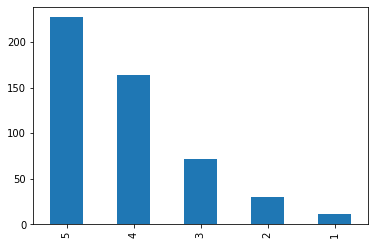

In [8]:
df.Score.value_counts().plot(kind="bar")

In [13]:
df.Score=df.Score.astype(str)
val = df.Score.value_counts()

In [9]:
import seaborn as sns

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years
Nr. reviews,1.00,0.66,0.79,-0.02,-0.14,0.02
Nr. hotel reviews,0.66,1.00,0.76,0.01,-0.13,0.02
Helpful votes,0.79,0.76,1.00,0.02,-0.10,0.02
Score,-0.02,0.01,0.02,1.00,-0.08,-0.04
Nr. rooms,-0.14,-0.13,-0.10,-0.08,1.00,-0.02
Member years,0.02,0.02,0.02,-0.04,-0.02,1.00


In [10]:
df.isnull().sum()

User country         0
Nr. reviews          0
Nr. hotel reviews    0
Helpful votes        0
Score                0
Period of stay       0
Traveler type        0
Pool                 0
Gym                  0
Tennis court         0
Spa                  0
Casino               0
Free internet        0
Hotel name           0
Hotel stars          0
Nr. rooms            0
User continent       0
Member years         0
Review month         0
Review weekday       0
dtype: int64

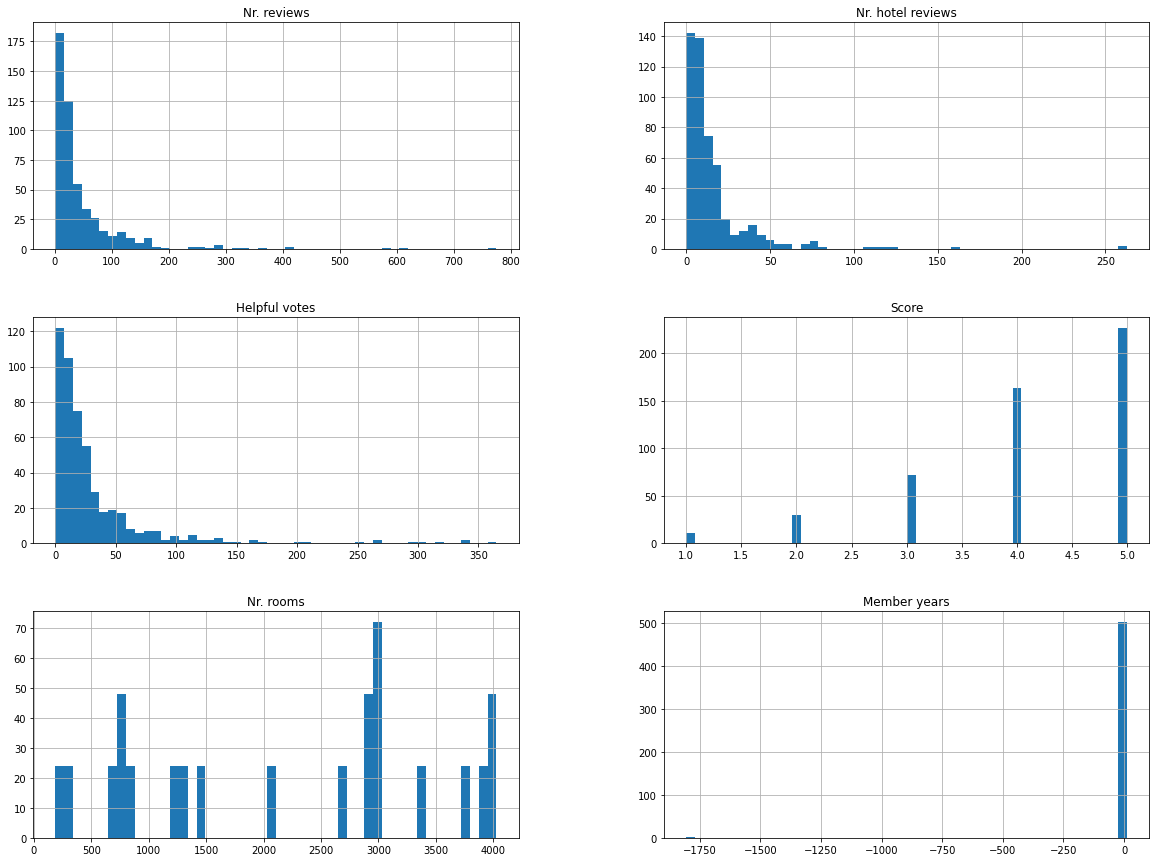

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show();

In [14]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

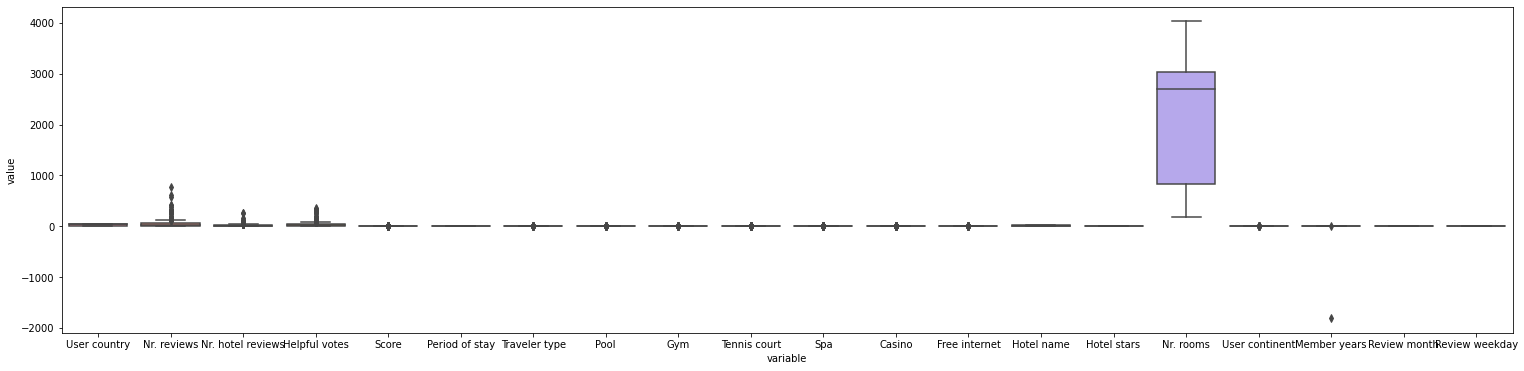

In [15]:
fig, ax = plt.subplots(figsize=(26, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(df),ax=ax)
plt.show()

In [16]:
standard_deviations = 3
df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations)
   .all(axis=1)]

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
24,20,29,11,15,3,0,1,1,1,0,1,1,1,4,0,3981,2,3,4,1
25,46,114,42,52,3,0,0,1,1,0,1,1,1,4,0,3981,3,11,4,2
26,3,30,12,17,4,0,1,1,1,0,1,1,1,4,0,3981,3,8,3,0
27,45,87,18,36,2,0,0,1,1,0,1,1,1,4,0,3981,2,3,3,4
28,46,26,10,28,4,2,4,1,1,0,1,1,1,4,0,3981,3,1,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,45,15,4,8,4,3,1,1,1,0,1,1,1,14,2,826,2,1,10,3
500,3,50,13,29,3,3,1,1,1,0,1,1,1,14,2,826,3,8,9,4
501,46,154,23,31,3,3,3,1,1,0,1,1,1,14,2,826,3,4,9,4
502,46,9,6,5,1,0,2,1,1,0,1,1,1,14,2,826,3,9,2,6


In [17]:
data = df.copy()

In [25]:
input = df.loc[:, df.columns != 'Score']
output= df['Score'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(input,output,test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200, random_state=42)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [26]:
y_pred_test = forest.predict(X_test)
y_pred_train = forest.predict(X_train)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test, target_names=val.keys()))
print(classification_report(y_train, y_pred_train, target_names=val.keys()))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           3       1.00      0.08      0.14        13
           2       0.35      0.32      0.34        34
           1       0.52      0.78      0.62        45

    accuracy                           0.47       101
   macro avg       0.38      0.24      0.22       101
weighted avg       0.48      0.47      0.41       101

              precision    recall  f1-score   support

           5       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        59
           2       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       182

    accuracy                           1.00       403
   macro avg       1.00      1.00      1.00       403
weighted avg       1.00      1.00      1.00       403



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
y_prob_test = list(forest.predict_proba(X_test))
y_prob_train = list(forest.predict_proba(X_train))

In [29]:
y_prob_train.extend(y_prob_test)

In [30]:
prob_class = list(val.keys())

In [31]:
new_class = []
for prob in y_prob_train:
    str1 = str(round(prob[0],1))+'-'+prob_class[0]+"-"+str(round(prob[1],1))+"-"+prob_class[1]
    new_class.append(str1)

In [32]:
data['new_class'] = new_class

data.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday,new_class
0,46,11,4,13,4,0,3,0,1,0,0,1,1,2,0,3773,3,9,4,4,0.0-5-0.0-4
1,46,119,21,75,2,0,0,0,1,0,0,1,1,2,0,3773,3,3,4,0,0.0-5-0.0-4
2,46,36,9,25,4,2,2,0,1,0,0,1,1,2,0,3773,3,2,3,2,0.0-5-0.0-4
3,45,14,7,14,3,2,3,0,1,0,0,1,1,2,0,3773,2,6,3,0,0.0-5-0.0-4
4,3,5,5,2,3,2,4,0,1,0,0,1,1,2,0,3773,3,7,7,5,0.0-5-0.0-4


In [33]:
def evaluate(model):
    print("Train Accuracy :", accuracy_score(y_train, model.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, model.predict(x_train)))
    print("Train classification report")
    print(classification_report(y_train, model.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, model.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, model.predict(x_test)))
    print("Test classification report")
    print(classification_report(y_test, model.predict(x_test)))


In [34]:
data.drop('Score',axis=1,inplace=True)

for col_name in data.columns:
    if(data[col_name].dtype == 'object'):
        data[col_name]= data[col_name].astype('category')
        data[col_name] = data[col_name].cat.codes

data.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday,new_class
0,46,11,4,13,0,3,0,1,0,0,1,1,2,0,3773,3,9,4,4,0
1,46,119,21,75,0,0,0,1,0,0,1,1,2,0,3773,3,3,4,0,0
2,46,36,9,25,2,2,0,1,0,0,1,1,2,0,3773,3,2,3,2,0
3,45,14,7,14,2,3,0,1,0,0,1,1,2,0,3773,2,6,3,0,0
4,3,5,5,2,2,4,0,1,0,0,1,1,2,0,3773,3,7,7,5,0


In [35]:
x = data.loc[:, data.columns != 'new_class']
y= data['new_class']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled,y,test_size=0.80,random_state=0)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 2)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [36]:
from sklearn.metrics import confusion_matrix
test_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test, test_pred)

cm

array([[311,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
          0,   0],
       [ 51,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  7,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       

In [37]:
print(classification_report(y_test, test_pred))


              precision    recall  f1-score   support

           0       0.77      0.99      0.87       313
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2

    accuracy                           0.77       404
   macro avg       0.05      0.07      0.06       404
weighted avg       0.60   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [38]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dtree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=2), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [39]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)

In [40]:
evaluate(grid_search.best_estimator_)

Train Accuracy : 0.78
Train Confusion Matrix:
[[78  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]]
Train classification report
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        78
           1       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [41]:
import tabulate
conclusion = [['Model', 'Precision','Recall', 'F1score', 'Accuracy'],
              ['RandomForest', 0.38, 0.24, 0.22, 0.47],
              ['DecisionTree', 0.05, 0.07 ,0.06, 0.77],
              ['DecisionTree after hyperparamter tunning', 0.06, 0.07 ,0.06, 0.77]
]
print(tabulate.tabulate(conclusion, tablefmt='fancy_grid'))

╒══════════════════════════════════════════╤═══════════╤════════╤═════════╤══════════╕
│ Model                                    │ Precision │ Recall │ F1score │ Accuracy │
├──────────────────────────────────────────┼───────────┼────────┼─────────┼──────────┤
│ RandomForest                             │ 0.38      │ 0.24   │ 0.22    │ 0.47     │
├──────────────────────────────────────────┼───────────┼────────┼─────────┼──────────┤
│ DecisionTree                             │ 0.05      │ 0.07   │ 0.06    │ 0.77     │
├──────────────────────────────────────────┼───────────┼────────┼─────────┼──────────┤
│ DecisionTree after hyperparamter tunning │ 0.06      │ 0.07   │ 0.06    │ 0.77     │
╘══════════════════════════════════════════╧═══════════╧════════╧═════════╧══════════╛


In [42]:
Rf=[ 0.38, 0.24, 0.22, 0.47]
DT= [0.05, 0.07 ,0.06, 0.77]
DT_tune=[ 0.06, 0.07 ,0.06, 0.77]

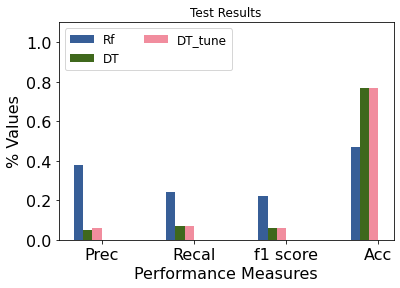

<Figure size 432x288 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt
import numpy as np


width = 0.1

r1 = np.arange(4)
r4 = [i + width for i in r1]
r5 = [i + width for i in r4]

plt.bar(r1, Rf, color='#375e97', width=width, label='Rf')


plt.bar(r4, DT, color='#3f681c', width=width, label='DT')
plt.bar(r5, DT_tune, color='#f18d9e', width=width, label='DT_tune')

plt.ylim(top=1.1)  # adjust the top leaving bottom unchanged
plt.xlabel('Performance Measures', fontsize=16)
plt.ylabel('% Values', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
plt.title('Test Results')

plt.xticks([r + 2.5*width for r in range(4)], [ 'Prec', 'Recal','f1 score','Acc'])

plt.legend(loc=2 , ncol=2, fontsize=12)
plt.show()

plt.savefig("output.jpg")